# 从高维数据向低维数据的映射

In [3]:
import numpy as np 
import matplotlib.pyplot as plt


In [4]:
x = np.empty((100,2))

In [5]:
x[:,0] = np.random.uniform(0.,100.,size=100)
x[:,1] = 0.75 * x[:,0] +3. + np.random.normal(0.,10.,size=100)
x[:10]

array([[48.03396463, 41.19631262],
       [98.72559247, 71.96715601],
       [ 5.62145075, 14.46304368],
       [51.40943129, 36.09581264],
       [25.94590907, 12.53170109],
       [73.53404593, 56.66617332],
       [52.68951446, 37.4213172 ],
       [16.4284679 , 13.45445745],
       [36.56318208, 31.9716218 ],
       [68.1638191 , 62.91728114]])

In [6]:
import sys
sys.path.append("F:/PYCode")####假如模块搜索的路径
from machine_learning.PCA import PCA


In [7]:
pca1 = PCA(n_components=2)
pca1.fit(x)

PCA(n_componnents = 2

In [8]:
print(pca1.components_)

[[ 0.78658496  0.61748206]
 [-0.61747831  0.78658791]]


In [9]:
pca2 = PCA(n_components=1)
pca2.fit(x)

PCA(n_componnents = 1

In [10]:
x_reduction  = pca2.transform(x)

In [11]:
x_reduction.shape

(100, 1)

In [12]:
x_restore = pca2.inverse_transform(x_reduction)

In [13]:
x_restore[:10]

array([[49.72850309, 39.03771114],
       [96.03767089, 75.39118657],
       [10.50281115,  8.24488337],
       [49.33963315, 38.73244169],
       [22.13981386, 17.38012617],
       [73.01954684, 57.32157213],
       [50.77544105, 39.85957504],
       [16.69940903, 13.1093169 ],
       [38.1508983 , 29.94909669],
       [72.73308022, 57.09669102]])

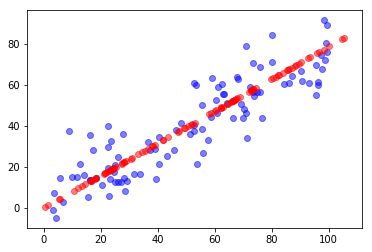

In [14]:
plt.scatter(x[:,0], x[:,1], color='b',alpha=0.5)
plt.scatter(x_restore[:,0], x_restore[:,1], color='r',alpha=0.5)
plt.show()

# scikit-learn中的PCA

In [22]:
from sklearn.decomposition import PCA
from sklearn import datasets 

In [16]:
pca = PCA(n_components = 1)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.components_

array([[0.78658481, 0.61748226]])

In [18]:
x_reduction.shape

(100, 1)

In [20]:
x_restore = pca.inverse_transform(x_reduction)

In [23]:
digits = datasets.load_digits()
x = digits.data
y = digits.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=666)## 1.先将数据集切分

In [24]:
x_train.shape

(1437, 64)

In [26]:
%%time 
from sklearn.neighbors import KNeighborsClassifier
knn_cif = KNeighborsClassifier()
knn_cif.fit(x_train, y_train)

Wall time: 45 ms


In [27]:
knn_cif.score(x_test,y_test)

0.9888888888888889

In [31]:
pca2 = PCA(n_components=2)
pca2.fit(x_train)
x_train_reduction = pca2.transform(x_train)
x_test_reduction = pca2.transform(x_test)

In [33]:
%%time
knn_cif2 = KNeighborsClassifier()
knn_cif2.fit(x_train_reduction, y_train)

Wall time: 25 ms


In [34]:
knn_cif.score(x_test_reduction, y_test) ## 维数降低过多，精确度不够

0.6055555555555555

In [35]:
pca2.explained_variance_ratio_  ## 解释的方差相应的比例，

array([0.1450646 , 0.13714246])

In [36]:
pca3 = PCA(n_components=x_train.shape[1])
pca3.fit(x_train)
pca3.explained_variance_ratio_

array([1.45064600e-01, 1.37142456e-01, 1.19680004e-01, 8.43768923e-02,
       5.87005941e-02, 5.01797333e-02, 4.34065700e-02, 3.61375740e-02,
       3.39661991e-02, 3.00599249e-02, 2.38906921e-02, 2.29417581e-02,
       1.81335935e-02, 1.78403959e-02, 1.47411385e-02, 1.41290045e-02,
       1.29333094e-02, 1.25283166e-02, 1.01123057e-02, 9.08986879e-03,
       8.98365069e-03, 7.72299807e-03, 7.62541166e-03, 7.09954951e-03,
       6.96433125e-03, 5.84665284e-03, 5.77225779e-03, 5.07732970e-03,
       4.84364707e-03, 4.34595748e-03, 3.73352381e-03, 3.57655938e-03,
       3.30727680e-03, 3.18129431e-03, 3.06969704e-03, 2.89170006e-03,
       2.51205204e-03, 2.27743660e-03, 2.22760483e-03, 2.00065017e-03,
       1.89529684e-03, 1.56877138e-03, 1.42740894e-03, 1.39115781e-03,
       1.20896097e-03, 1.10149976e-03, 9.81702199e-04, 8.82376601e-04,
       5.69898729e-04, 4.10322729e-04, 2.32125043e-04, 8.49807543e-05,
       5.37426557e-05, 5.27990816e-05, 1.03398093e-05, 6.20749843e-06,
      

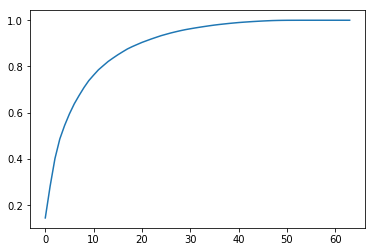

In [45]:
plt.plot([i for i in range(x_train.shape[1])],[np.sum(pca3.explained_variance_ratio_[:i+1]) for i in range(x_train.shape[1])])
plt.show()

In [46]:
pca4 = PCA(0.95)  ## 代表我们得PCA可以解释95% 以上的数据

In [47]:
pca4.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [48]:
pca4.n_components_

28

In [49]:
x_train_reduction = pca4.transform(x_train)
x_test_reduction = pca4.transform(x_test)

In [50]:
%%time 
knn_cif4 = KNeighborsClassifier()
knn_cif4.fit(x_train_reduction, y_train)

Wall time: 7 ms


In [51]:
knn_cif4.score(x_test_reduction, y_test)

0.9833333333333333

In [53]:
pca5 = PCA(n_components=2)
pca5.fit(x)
x_reduction = pca5.transform(x)

In [54]:
x_reduction.shape

(1797, 2)

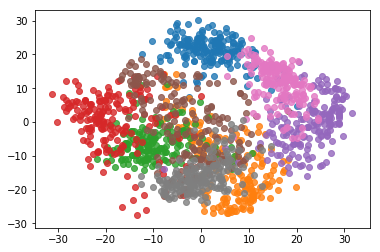

In [55]:
for i in range(8):
    plt.scatter(x_reduction[y==i,0], x_reduction[y==i,1], alpha=0.8)
plt.show()